In [1]:
import pandas as pd
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import xml.etree.ElementTree as et
import numpy as np

In [2]:
gt_2022 = 'task3/training/t3_training/TRAINING DATA (FROM ERISK 2022 AND 2023)/2022/T3 2022/ground-truth_eRisk2022_T3.txt'
gt_2023 = 'task3/training/t3_training/TRAINING DATA (FROM ERISK 2022 AND 2023)/2023/erisk 2023_T3/golden-truth_eRisk2023_T3.txt'

In [3]:
gt_2022_df = pd.read_csv(gt_2022, sep=" ", header=None)

In [4]:
gt_2022_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,erisk2022-T3_Subject1,6,5,6,6,6,6,5,6,6,...,5,6,6,6,6,6,6,6,6,6
1,erisk2022-T3_Subject2,0,0,0,0,0,1,3,0,1,...,0,0,1,0,1,0,0,1,2,1
2,erisk2022-T3_Subject3,1,6,0,0,2,1,3,1,0,...,2,1,1,2,3,0,2,3,4,2
3,erisk2022-T3_Subject4,2,1,4,6,1,6,4,5,4,...,4,6,2,2,6,1,3,6,5,4
4,erisk2022-T3_Subject5,6,0,3,6,5,4,3,1,3,...,5,2,1,0,1,0,4,5,2,3
5,erisk2022-T3_Subject6,6,3,0,5,2,2,2,2,1,...,2,2,1,5,4,6,6,5,5,4
6,erisk2022-T3_Subject7,0,0,0,0,0,1,0,0,1,...,1,1,0,2,1,0,0,1,1,1
7,erisk2022-T3_Subject8,5,2,3,6,1,1,6,0,6,...,0,0,0,5,5,0,0,2,4,0
8,erisk2022-T3_Subject9,6,6,0,6,6,6,6,0,6,...,2,2,2,6,6,4,6,6,6,6
9,erisk2022-T3_Subject10,4,3,3,6,4,6,6,6,6,...,4,5,5,6,6,6,6,5,4,5


In [5]:
gt_2023_df = pd.read_csv(gt_2023, sep=" ", header=None)

In [6]:
gt_2023_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,erisk2023-T3_Subject1,2,0,0,0,0,3,1,0,6,...,1,0,0,1,2,0,0,1,1,1
1,erisk2023-T3_Subject2,5,1,5,3,4,6,5,5,4,...,3,5,6,6,6,6,6,6,6,5
2,erisk2023-T3_Subject3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,3,0,0,0
3,erisk2023-T3_Subject4,0,6,6,0,0,6,0,0,1,...,0,0,0,5,5,0,0,1,0,2
4,erisk2023-T3_Subject5,1,0,1,0,0,2,0,0,0,...,0,1,0,1,2,4,2,2,2,2
5,erisk2023-T3_Subject6,6,5,6,6,0,0,0,0,6,...,2,1,3,1,1,0,5,5,5,4
6,erisk2023-T3_Subject7,6,5,5,5,6,6,4,4,6,...,1,1,1,6,3,5,5,3,4,4
7,erisk2023-T3_Subject8,5,4,6,4,5,6,1,1,1,...,0,3,0,3,3,3,4,3,2,3
8,erisk2023-T3_Subject9,3,2,3,0,2,6,0,0,0,...,0,0,0,1,3,0,0,0,0,0
9,erisk2023-T3_Subject10,2,0,2,1,3,6,3,3,1,...,0,1,0,2,2,6,2,1,2,1


In [7]:
fp_2022 = "/Users/aaryanpotdar/Desktop/Kaggle_CLEF/json_files/2022_path"
fp_2023 = "/Users/aaryanpotdar/Desktop/Kaggle_CLEF/json_files/2023_path"

In [8]:
import json, os

In [9]:
df_2022 = pd.DataFrame()

for file_name in os.listdir(fp_2022):
    if file_name.endswith('.json'):
        file_path = os.path.join(fp_2022, file_name)
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        for post in data.get('posts',[]):
            df = pd.DataFrame([post])
            
            df['ID'] = file_name.replace('.json', '')
        
            df_2022 = pd.concat([df_2022, df], ignore_index=True)

In [10]:
df_2022

,title,date,info,text,ID
0,,2021-11-20 16:44:19,reddit post,"yoga is vvvv helpful for me, do it slowly and ...",eRisk2022-T3_Subject4
1,,2021-11-20 16:42:20,reddit post,oml im so proud of you!!!! keep it up!!!!,eRisk2022-T3_Subject4
2,,2021-11-02 16:21:35,reddit post,update!!! did eat dinner last night and had a ...,eRisk2022-T3_Subject4
3,shout out,2021-11-02 00:58:17,reddit post,j a little appreciation post bc this is the on...,eRisk2022-T3_Subject4
4,,2021-11-01 12:59:17,reddit post,from my understanding you can keep them until ...,eRisk2022-T3_Subject4
...,...,...,...,...,...
10463,,2019-03-26 00:54:09,reddit post,I think I need more info about the safewords a...,eRisk2022-T3_Subject11
10464,,2019-03-26 00:48:23,reddit post,Coming from a place where topic about sex is t...,eRisk2022-T3_Subject11
10465,,2019-03-26 00:39:14,reddit post,"If I am not mistaken, he said ""might not be ab...",eRisk2022-T3_Subject11
10466,I [25F] am still exploring my sex life,2019-03-26 00:20:55,reddit post,I [25F] am still in the process of exploring m...,eRisk2022-T3_Subject11


In [11]:
df_2023 = pd.DataFrame()

for file_name in os.listdir(fp_2023):
    if file_name.endswith('.json'):
        file_path = os.path.join(fp_2023, file_name)

        with open(file_path, 'r') as file:
            data = json.load(file)
        
        for post in data.get('posts',[]):
            df = pd.DataFrame([post])
            df['ID'] = file_name.replace('.json', '')
        
            df_2023 = pd.concat([df_2023, df], ignore_index=True)

In [12]:
df_2023

,title,date,info,text,ID
0,b' ',b'2022-10-17 11:48:35',reddit post,b'cramming tooo!! add me to any study gc so we...,eRisk2023-T3_Subject33
1,b' ',b'2022-10-10 20:42:24',reddit post,b'count me in please!',eRisk2023-T3_Subject33
2,b'food goes back up',b'2022-09-28 17:33:56',reddit post,b'does anyone else experience this? ive been t...,eRisk2023-T3_Subject33
3,b'i\xe2\x80\x99m glad my mom died thoughts',b'2022-09-23 19:34:59',reddit post,b'not sure if anyone\xe2\x80\x99s read the boo...,eRisk2023-T3_Subject33
4,b'i hate myself too much',b'2022-06-20 18:56:49',reddit post,b'i cant stop binge purging :( i need help so ...,eRisk2023-T3_Subject33
...,...,...,...,...,...
19422,b' ',b'2014-04-04 22:49:31',reddit post,b'I assumed Xbox or PS3 because the console ve...,eRisk2023-T3_Subject26
19423,b' ',b'2014-04-04 19:25:50',reddit post,b'Xbox or PS3?',eRisk2023-T3_Subject26
19424,b' ',b'2014-04-03 08:48:18',reddit post,"b""Add me man GT : iGoD MaNiAcS Zz\nI've got a ...",eRisk2023-T3_Subject26
19425,b' ',b'2014-04-02 20:20:18',reddit post,b'Add me\nGT: iGoD MaNiAcS Zz',eRisk2023-T3_Subject26


In [13]:
#removing b'' in byte string format
def clean_text(item):
    if isinstance(item, str) and item.startswith("b'") and item.endswith("'"):
        return item[2:-1]  # Remove the first two and the last character
    return item
def clean_text2(item):
    if isinstance(item, str) and item.startswith('b"') and item.endswith('"'):
        return item[2:-1]  # Remove the first two and the last character
    return item
df_2023 = df_2023.map(clean_text)
df_2023 = df_2023.map(clean_text2)

df_2023

,title,date,info,text,ID
0,,2022-10-17 11:48:35,reddit post,cramming tooo!! add me to any study gc so we c...,eRisk2023-T3_Subject33
1,,2022-10-10 20:42:24,reddit post,count me in please!,eRisk2023-T3_Subject33
2,food goes back up,2022-09-28 17:33:56,reddit post,does anyone else experience this? ive been try...,eRisk2023-T3_Subject33
3,i\xe2\x80\x99m glad my mom died thoughts,2022-09-23 19:34:59,reddit post,"not sure if anyone\xe2\x80\x99s read the book,...",eRisk2023-T3_Subject33
4,i hate myself too much,2022-06-20 18:56:49,reddit post,i cant stop binge purging :( i need help so ba...,eRisk2023-T3_Subject33
...,...,...,...,...,...
19422,,2014-04-04 22:49:31,reddit post,I assumed Xbox or PS3 because the console vers...,eRisk2023-T3_Subject26
19423,,2014-04-04 19:25:50,reddit post,Xbox or PS3?,eRisk2023-T3_Subject26
19424,,2014-04-03 08:48:18,reddit post,Add me man GT : iGoD MaNiAcS Zz\nI've got a 73...,eRisk2023-T3_Subject26
19425,,2014-04-02 20:20:18,reddit post,Add me\nGT: iGoD MaNiAcS Zz,eRisk2023-T3_Subject26


In [14]:
# decoding unicode characters
def decode_unicode(text):
    return text.encode('utf-8').decode('unicode-escape')

df_2022['text'] = df_2022['text'].apply(decode_unicode)
df_2022['title'] = df_2022['title'].apply(decode_unicode)
df_2023['text'] = df_2023['text'].apply(decode_unicode)
df_2023['title'] = df_2023['title'].apply(decode_unicode)

/var/folders/g_/q1mhhlqx2kvc2wsjsrmc7kx00000gn/T/ipykernel_28192/423894146.py:3: DeprecationWarning: invalid escape sequence '\*'
  return text.encode('utf-8').decode('unicode-escape')
/var/folders/g_/q1mhhlqx2kvc2wsjsrmc7kx00000gn/T/ipykernel_28192/423894146.py:3: DeprecationWarning: invalid escape sequence '\_'
  return text.encode('utf-8').decode('unicode-escape')
/var/folders/g_/q1mhhlqx2kvc2wsjsrmc7kx00000gn/T/ipykernel_28192/423894146.py:3: DeprecationWarning: invalid escape sequence '\-'
  return text.encode('utf-8').decode('unicode-escape')
/var/folders/g_/q1mhhlqx2kvc2wsjsrmc7kx00000gn/T/ipykernel_28192/423894146.py:3: DeprecationWarning: invalid escape sequence '\['
  return text.encode('utf-8').decode('unicode-escape')
/var/folders/g_/q1mhhlqx2kvc2wsjsrmc7kx00000gn/T/ipykernel_28192/423894146.py:3: DeprecationWarning: invalid escape sequence '\~'
  return text.encode('utf-8').decode('unicode-escape')


In [15]:
# removing words begining with r/ or u/. These are specific to reddit and don't add meaning to context
def remove_r_u(text):
    pattern = r'\b(?:u/|r/)\w+\b'
    return re.sub(pattern, '', text)

df_2022['text'] = df_2022['text'].apply(remove_r_u)
df_2022['title'] = df_2022['title'].apply(remove_r_u)
df_2023['text'] = df_2023['text'].apply(remove_r_u)
df_2023['title'] = df_2023['title'].apply(remove_r_u)

In [16]:
# subject 20 in df_2022
def remove_substrings(text):
    substrings_to_remove = ['6369', 'ign', 'teddy']
    for substring in substrings_to_remove:
        text = text.lower().replace(substring, '')
    return text

In [17]:
subject20 = df_2022['ID'] == 'eRisk2022-T3_Subject20' 

In [18]:
df_2022.loc[subject20, 'text'] = df_2022.loc[subject20, 'text'].apply(remove_substrings)

In [19]:
from tokenizer import tokenizer
R = tokenizer.RedditTokenizer()

# text = "Hey u/NLPer! This is a #NLProc message."
# tokens = R.tokenize(text.lower())

# print(tokens)

def remove_punctuation(text):
    result = []
    for char in text:
        if char not in string.punctuation:
            result.append(char)
    return ''.join(result)

def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

def join_lists_to_sentences(lst):
    return ' '.join(lst)

In [20]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aaryanpotdar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# remove \n character
df_2022['title'] = df_2022['title'].str.replace('\n', '', regex=False)
df_2023['title'] = df_2023['title'].str.replace('\n', '', regex=False)
df_2022['text'] = df_2022['text'].str.replace('\n', '', regex=False)
df_2023['text'] = df_2023['text'].str.replace('\n', '', regex=False)

In [23]:
# remove urls
df_2022['text'] = df_2022['text'].apply(lambda ele: re.sub(r"https?://\S+", "", ele))
df_2022['title'] = df_2022['title'].apply(lambda ele: re.sub(r"https?://\S+", "", ele))
df_2023['text'] = df_2023['text'].apply(lambda ele: re.sub(r"https?://\S+", "", ele))
df_2023['title'] = df_2023['title'].apply(lambda ele: re.sub(r"https?://\S+", "", ele))

In [24]:
df_2022['text'] = df_2022['text'].apply(lambda x: remove_punctuation(x), 1)
df_2022['text'] = df_2022['text'].apply(lambda x: R.tokenize(x.lower()))
df_2022['text'] = df_2022['text'].apply(join_lists_to_sentences)
# df_2022['text'] = df_2022['text'].apply(lambda x: remove_stopwords(x))
# df_2022['text'] = df_2022['text'].apply(lambda x: word_lemmatizer(x))

df_2022['title'] = df_2022['title'].apply(lambda x: remove_punctuation(x), 1)
df_2022['title'] = df_2022['title'].apply(lambda x: R.tokenize(x.lower()))
df_2022['title'] = df_2022['title'].apply(join_lists_to_sentences)
# df_2022['title'] = df_2022['title'].apply(lambda x: remove_stopwords(x))
# df_2022['title'] = df_2022['title'].apply(lambda x: word_lemmatizer(x))

/var/folders/g_/q1mhhlqx2kvc2wsjsrmc7kx00000gn/T/ipykernel_28192/3570499056.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df_2022['text'] = df_2022['text'].apply(lambda x: remove_punctuation(x), 1)
/var/folders/g_/q1mhhlqx2kvc2wsjsrmc7kx00000gn/T/ipykernel_28192/3570499056.py:7: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df_2022['title'] = df_2022['title'].apply(lambda x: remove_punctuation(x), 1)


In [25]:
# remove all non-alpha numeric characters.
df_2022['text'] = df_2022['text'].apply(lambda ele: re.sub(r'[^a-zA-Z0-9\s\.]', '', ele))
df_2022['title'] = df_2022['title'].apply(lambda ele: re.sub(r'[^a-zA-Z0-9\s\.]', '', ele))
df_2023['text'] = df_2023['text'].apply(lambda ele: re.sub(r'[^a-zA-Z0-9\s\.]', '', ele))
df_2023['title'] = df_2023['title'].apply(lambda ele: re.sub(r'[^a-zA-Z0-9\s\.]', '', ele))

In [26]:
# adjust spacing
df_2022['text'] = df_2022['text'].apply(lambda x: re.sub(r'\s+', ' ', x))
df_2022['title'] = df_2022['title'].apply(lambda x: re.sub(r'\s+', ' ', x))
df_2023['text'] = df_2023['text'].apply(lambda x: re.sub(r'\s+', ' ', x))
df_2023['title'] = df_2023['title'].apply(lambda x: re.sub(r'\s+', ' ', x))


In [27]:
df_2022

,title,date,info,text,ID
0,,2021-11-20 16:44:19,reddit post,yoga is vvvv helpful for me do it slowly and c...,eRisk2022-T3_Subject4
1,,2021-11-20 16:42:20,reddit post,oml im so proud of you keep it up,eRisk2022-T3_Subject4
2,,2021-11-02 16:21:35,reddit post,update did eat dinner last night and had a smo...,eRisk2022-T3_Subject4
3,shout out,2021-11-02 00:58:17,reddit post,j a little appreciation post bc this is the on...,eRisk2022-T3_Subject4
4,,2021-11-01 12:59:17,reddit post,from my understanding you can keep them until ...,eRisk2022-T3_Subject4
...,...,...,...,...,...
10463,,2019-03-26 00:54:09,reddit post,i think i need more info about the safewords a...,eRisk2022-T3_Subject11
10464,,2019-03-26 00:48:23,reddit post,coming from a place where topic about sex is t...,eRisk2022-T3_Subject11
10465,,2019-03-26 00:39:14,reddit post,if i am not mistaken he said might not be able...,eRisk2022-T3_Subject11
10466,i 25f am still exploring my sex life,2019-03-26 00:20:55,reddit post,i 25f am still in the process of exploring my ...,eRisk2022-T3_Subject11


In [28]:
# !pip install git+https://github.com/erikavaris/tokenizer.git

In [29]:
df_2023['text'] = df_2023['text'].apply(lambda x: remove_punctuation(x), 1)
df_2023['text'] = df_2023['text'].apply(lambda x: R.tokenize(x.lower()))
df_2023['text'] = df_2023['text'].apply(join_lists_to_sentences)
# df_2023['text'] = df_2023['text'].apply(lambda x: remove_stopwords(x))
# df_2023['text'] = df_2023['text'].apply(lambda x: word_lemmatizer(x))

df_2023['title'] = df_2023['title'].apply(lambda x: remove_punctuation(x), 1)
df_2023['title'] = df_2023['title'].apply(lambda x: R.tokenize(x.lower()))
df_2023['title'] = df_2023['title'].apply(join_lists_to_sentences)
# df_2023['title'] = df_2023['title'].apply(lambda x: remove_stopwords(x))
# df_2023['title'] = df_2023['title'].apply(lambda x: word_lemmatizer(x))

/var/folders/g_/q1mhhlqx2kvc2wsjsrmc7kx00000gn/T/ipykernel_28192/4176993574.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df_2023['text'] = df_2023['text'].apply(lambda x: remove_punctuation(x), 1)
/var/folders/g_/q1mhhlqx2kvc2wsjsrmc7kx00000gn/T/ipykernel_28192/4176993574.py:7: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df_2023['title'] = df_2023['title'].apply(lambda x: remove_punctuation(x), 1)


In [30]:
df_2022.to_csv('2022_users.csv', index=False)
df_2023.to_csv('2023_users.csv', index=False)

In [31]:
df_2022

,title,date,info,text,ID
0,,2021-11-20 16:44:19,reddit post,yoga is vvvv helpful for me do it slowly and c...,eRisk2022-T3_Subject4
1,,2021-11-20 16:42:20,reddit post,oml im so proud of you keep it up,eRisk2022-T3_Subject4
2,,2021-11-02 16:21:35,reddit post,update did eat dinner last night and had a smo...,eRisk2022-T3_Subject4
3,shout out,2021-11-02 00:58:17,reddit post,j a little appreciation post bc this is the on...,eRisk2022-T3_Subject4
4,,2021-11-01 12:59:17,reddit post,from my understanding you can keep them until ...,eRisk2022-T3_Subject4
...,...,...,...,...,...
10463,,2019-03-26 00:54:09,reddit post,i think i need more info about the safewords a...,eRisk2022-T3_Subject11
10464,,2019-03-26 00:48:23,reddit post,coming from a place where topic about sex is t...,eRisk2022-T3_Subject11
10465,,2019-03-26 00:39:14,reddit post,if i am not mistaken he said might not be able...,eRisk2022-T3_Subject11
10466,i 25f am still exploring my sex life,2019-03-26 00:20:55,reddit post,i 25f am still in the process of exploring my ...,eRisk2022-T3_Subject11


In [32]:
df_2022_freq = df_2022

In [33]:
def corpus(text):
    text_list = text.split()
    return text_list

df_2022_freq['text_list'] = df_2022_freq['text'].apply(corpus)
df_2022_freq.head(10)

,title,date,info,text,ID,text_list
0,,2021-11-20 16:44:19,reddit post,yoga is vvvv helpful for me do it slowly and c...,eRisk2022-T3_Subject4,"[yoga, is, vvvv, helpful, for, me, do, it, slo..."
1,,2021-11-20 16:42:20,reddit post,oml im so proud of you keep it up,eRisk2022-T3_Subject4,"[oml, im, so, proud, of, you, keep, it, up]"
2,,2021-11-02 16:21:35,reddit post,update did eat dinner last night and had a smo...,eRisk2022-T3_Subject4,"[update, did, eat, dinner, last, night, and, h..."
3,shout out,2021-11-02 00:58:17,reddit post,j a little appreciation post bc this is the on...,eRisk2022-T3_Subject4,"[j, a, little, appreciation, post, bc, this, i..."
4,,2021-11-01 12:59:17,reddit post,from my understanding you can keep them until ...,eRisk2022-T3_Subject4,"[from, my, understanding, you, can, keep, them..."
5,,2021-10-30 14:54:57,reddit post,bc same i would work out but my legs j got big...,eRisk2022-T3_Subject4,"[bc, same, i, would, work, out, but, my, legs,..."
6,,2021-10-30 14:54:35,reddit post,honestly trying to be perceived as strong inst...,eRisk2022-T3_Subject4,"[honestly, trying, to, be, perceived, as, stro..."
7,,2021-10-29 22:49:26,reddit post,yes all the time lmfaoit s embarrassing the am...,eRisk2022-T3_Subject4,"[yes, all, the, time, lmfaoit, s, embarrassing..."
8,,2021-10-27 20:43:13,reddit post,omfg good job,eRisk2022-T3_Subject4,"[omfg, good, job]"
9,,2021-10-26 21:35:37,reddit post,im so sorry this is a very scary place to be i...,eRisk2022-T3_Subject4,"[im, so, sorry, this, is, a, very, scary, plac..."


In [34]:
from tqdm import trange 

corpus = []
for i in trange(df_2022_freq.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df_2022_freq['text_list'].iloc[i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 10468/10468 [00:00<00:00, 276252.87it/s]


333518

In [35]:
from collections import Counter

mostCommon = Counter(corpus).most_common(10)
mostCommon

[('i', 13670),
 ('the', 9444),
 ('to', 9064),
 ('and', 8584),
 ('a', 7214),
 ('it', 5670),
 ('you', 4917),
 ('that', 4504),
 ('of', 4440),
 ('my', 4094)]

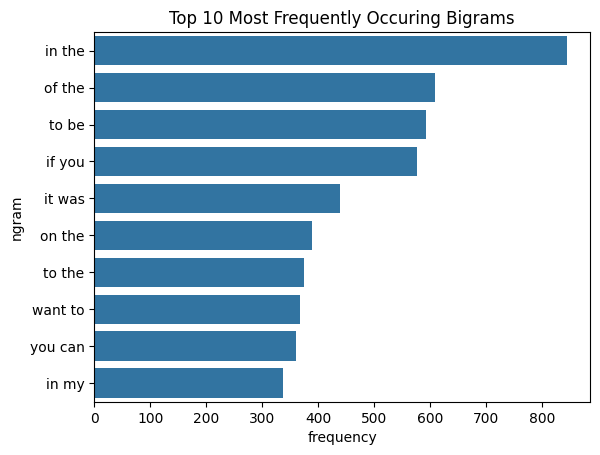

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# most frequently occuring N_grams
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df_2022_freq['text'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

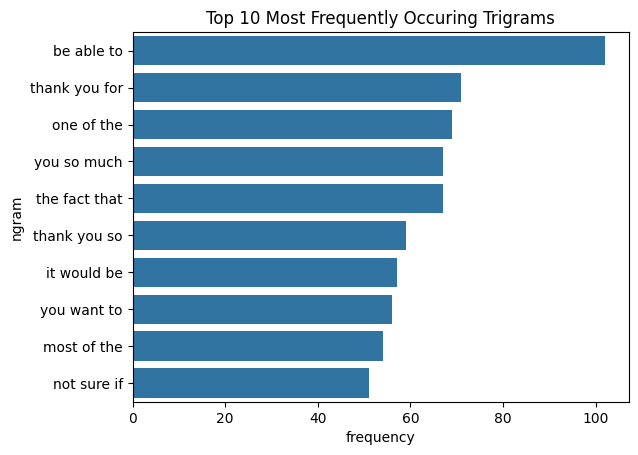

In [37]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df_2022_freq['text'])

count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()